In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


df = pd.read_csv('processed_dataset.csv')

# Objective on the data modelling


As seen on the EDA, there is a sector of students that are failing the subjects, as can be seen here.
  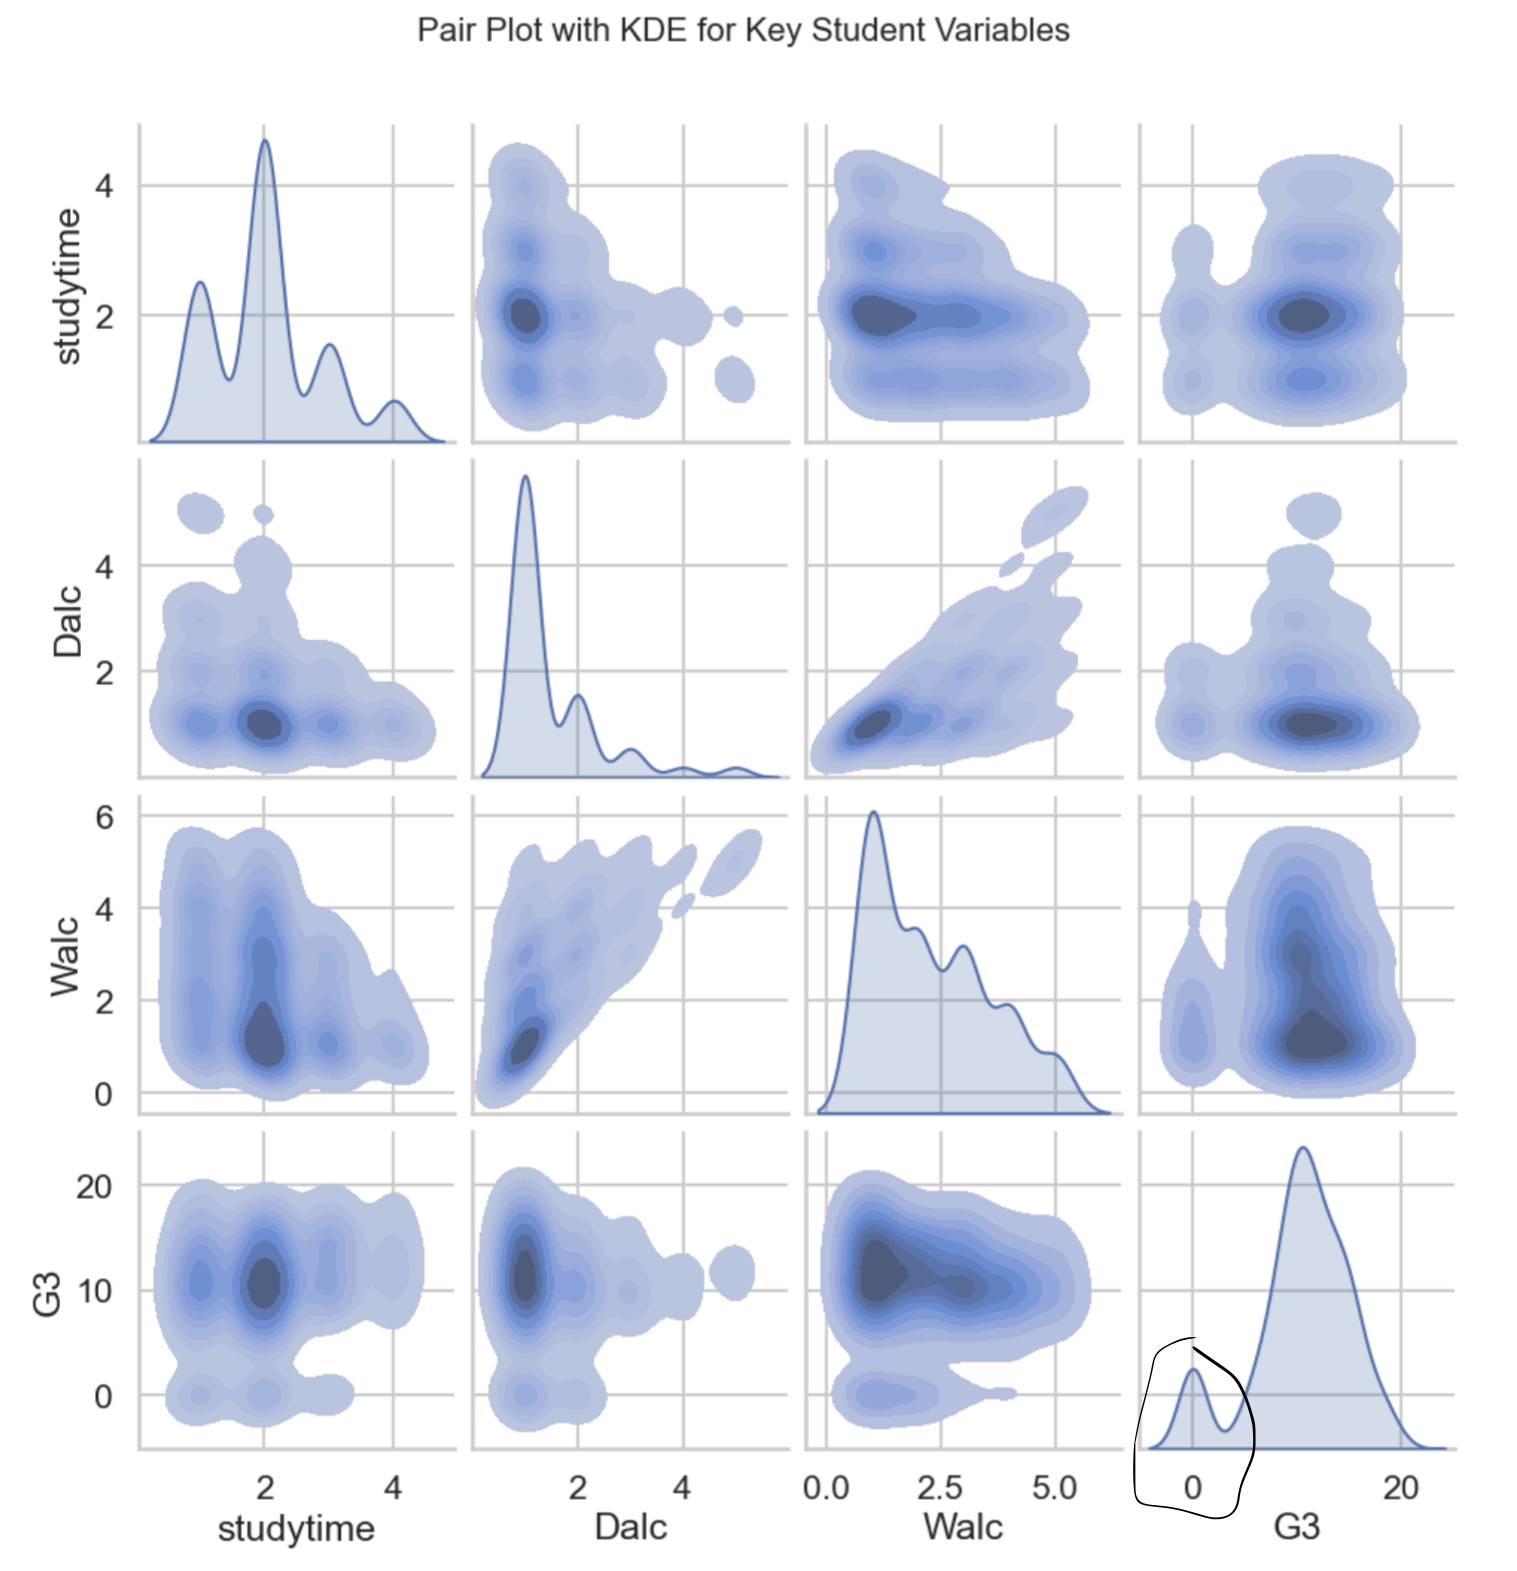

In [2]:

# Parent Education and Support Interaction
df['parent_edu_support'] = (df['Medu'] + df['Fedu']) / 2 * df['famsup']

# Study Time and Travel Time Interaction
df['study_travel_interaction'] = df['studytime'] * df['traveltime']

# Display the first few rows of the DataFrame to verify the new columns
print(df.head())


   school  sex  address  famsize  Pstatus  age  Dalc  Walc  health  absences  \
0       1    0        0        1        0   18     1     1       5        75   
1       1    0        0        1        0   19     1     2       5        12   
2       1    0        0        1        0   17     2     3       2         4   
3       1    0        0        1        1   19     1     1       3        40   
4       1    0        0        1        1   18     1     1       4         0   

   ...  Fjob_teacher  reason_course  reason_home  reason_other  \
0  ...             0              0            1             0   
1  ...             0              0            1             0   
2  ...             0              0            1             0   
3  ...             0              0            0             0   
4  ...             0              1            0             0   

   reason_reputation  guardian_father  guardian_mother  guardian_other  \
0                  0                0           

In [3]:
df['social_life_index'] = (df['freetime'] + df['goout'] + df['romantic']) / 3

# Health Risk Score
df['health_risk_score'] = (df['health'] + df['Dalc'] + df['Walc']) / 3


In [4]:
df.head()

,school,sex,address,famsize,Pstatus,age,Dalc,Walc,health,absences,...,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,parent_edu_support,study_travel_interaction,social_life_index,health_risk_score
0,1,0,0,1,0,18,1,1,5,75,...,1,0,0,0,1,0,0.0,4.0,1.000000,2.333333
1,1,0,0,1,0,19,1,2,5,12,...,1,0,0,0,0,1,0.0,3.0,2.333333,2.666667
2,1,0,0,1,0,17,2,3,2,4,...,1,0,0,0,1,0,2.5,2.0,2.000000,2.333333
3,1,0,0,1,1,19,1,1,3,40,...,0,0,1,0,0,1,0.0,3.0,1.333333,1.666667
4,1,0,0,1,1,18,1,1,4,0,...,0,0,0,0,1,0,0.0,8.0,2.666667,2.000000


In [5]:


# Students are at risk if G3 < 10 and health_risk_score > 2.5
df['at_risk'] = ((df['G3'] < 10) & (df['health_risk_score'] > 2.5) & ((df['Dalc'] > 1) | (df['Walc'] > 2))).astype(int)

# Remove original columns used in feature engineering
columns_to_remove = ['Medu', 'Fedu', 'famsup', 'studytime', 'traveltime', 'freetime', 'goout', 'romantic', 'Dalc', 'Walc', 'health']
df = df.drop(columns=columns_to_remove)

# Display the first few rows of the modified DataFrame
print(df.head())


   school  sex  address  famsize  Pstatus  age  absences  Math  Portuguese  \
0       1    0        0        1        0   18        75     1           1   
1       1    0        0        1        0   19        12     1           1   
2       1    0        0        1        0   17         4     1           1   
3       1    0        0        1        1   19        40     1           1   
4       1    0        0        1        1   18         0     1           1   

     G1  ...  reason_other  reason_reputation  guardian_father  \
0  10.0  ...             0                  0                0   
1  14.0  ...             0                  0                0   
2   9.0  ...             0                  0                0   
3  13.0  ...             0                  1                0   
4  10.0  ...             0                  0                0   

   guardian_mother  guardian_other  parent_edu_support  \
0                1               0                 0.0   
1                0

In [6]:
# Prepare Data for Modeling
X = df.drop(['at_risk'], axis=1)  # Feature Matrix
y = df['at_risk']  # Target Variable

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize and Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the Model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        70
           1       1.00      0.89      0.94         9

    accuracy                           0.99        79
   macro avg       0.99      0.94      0.97        79
weighted avg       0.99      0.99      0.99        79

[[70  0]
 [ 1  8]]


In [7]:
# Initialize and Train Model
model = RandomForestClassifier(min_samples_split=5,random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.99      1.00      0.99        70
           1       1.00      0.89      0.94         9

    accuracy                           0.99        79
   macro avg       0.99      0.94      0.97        79
weighted avg       0.99      0.99      0.99        79

[[70  0]
 [ 1  8]]


In [8]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_
best_model

Fitting 3 folds for each of 36 candidates, totalling 108 fits


RandomForestClassifier(min_samples_split=5, random_state=42)

In [9]:
import pandas as pd

# Extracting feature importances from the model
importances = model.feature_importances_

# Getting feature names
feature_list = list(X.columns)

# Combining importances and feature names
feature_importance = list(zip(feature_list, importances))

# Creating a DataFrame from the combined list
feature_importance_df = pd.DataFrame(feature_importance, columns=['Feature', 'Importance'])

# Sorting the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Displaying the DataFrame
print("Feature Importance Scores:\n")
print(feature_importance_df)


Feature Importance Scores:

                     Feature  Importance
0                         G3    0.200817
1          health_risk_score    0.199212
2                         G2    0.113203
3                         G1    0.067514
4                   absences    0.045384
5                   failures    0.044753
6          social_life_index    0.044303
7                        age    0.030313
8         parent_edu_support    0.027731
9                        sex    0.026182
10                    higher    0.022737
11  study_travel_interaction    0.015132
12                activities    0.012170
13                    famrel    0.011391
14              Mjob_teacher    0.009674
15             Fjob_services    0.009051
16                   famsize    0.008526
17                   address    0.008228
18              Fjob_at_home    0.007613
19                Fjob_other    0.007355
20                 schoolsup    0.007274
21           guardian_father    0.006985
22                    school 

1. **G3 (Final Grade)**: Highly predictive of risk status, indicating final academic performance is crucial.
2. **Health Risk Score**: Almost as influential as G3, suggesting health and lifestyle factors significantly impact risk.
3. **G2 (Second Period Grade)**: Important indicator, showing mid-term academic performance's role in risk assessment.
4. **G1 (First Period Grade)**: Early academic performance is a notable predictor, though less impactful than later grades.
5. **Absences**: Moderately significant, implying that frequent absence from school correlates with increased risk.
6. **Failures**: Past class failures are a strong indicator, pointing to a link between academic struggles and risk.
7. **Social Life Index**: Reflects the combined effect of social factors on a student's risk level.


In [10]:
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)

Cross-validation scores: [0.89873418 0.94936709 0.94936709 0.98734177 0.97435897]


In [11]:

# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Fit the model
gb_clf.fit(X_train, y_train)

# Predictions and evaluation
gb_y_pred = gb_clf.predict(X_test)
print("Gradient Boosting Classifier:")
print(classification_report(y_test, gb_y_pred))


Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00         9

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79

[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=30, min_samples_split=2, n_estimators=200; total 

## Model Performance:
The Gradient Boosting Classifier emerged as the most effective model, demonstrating high precision, recall, and overall accuracy. This indicates a strong ability to correctly identify students at risk based on the chosen criteria.